## Pair Programming Random Forest

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal. El objetivo de hoy es:

 - Ajustar el modelo a un Decision Tree
 - Extraer las métricas
 - Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [2]:
# antes de nada deberéis importar la siguiente librería
!pip install tqdm

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Barra de progreso de un proceso
# ------------------------------------------------------------------------------
from tqdm import tqdm

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [3]:
df = pd.read_csv("../datos/sephora_website_dataset5.csv", index_col = 0)
df.head()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer,MarketingFlags_map,MarketingFlags_content_map2
0,2218774,4.0,4,3002,66.0,75.0,1,0,0,0,1,2
1,2044816,4.5,76,2700,66.0,66.0,1,0,0,0,1,2
2,1417567,4.5,26,2600,180.0,180.0,1,0,0,0,1,2
3,1417617,4.5,23,2900,120.0,120.0,1,0,0,0,1,2
4,2218766,3.5,2,943,72.0,80.0,1,0,0,0,1,2


-Al igual que en Decision_Tree, separamos el dataframe en X e y

In [4]:
X = df.drop("rating", axis = 1)
y = df["rating"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Ajustamos el modelo:
- Creamos un modelo sin especificar ningún hiperparámetro
- Evaluamos sus métricas y en función de estas establecemos los valores para:
    * max_depth
    * max_features
    * (min_samples_split y min_sample_leaf)se utilizaban unos valores que estaban establecidos por "convenio"

In [6]:
param = {"max_depth": [2,4, 6], 
        "max_features": [1,2,3,4],
        
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [7]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [8]:
gs_rf.fit(x_train, y_train)

KeyboardInterrupt: 

In [12]:

bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=6, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

- Calculamos las métricas para reconocer la validez del modelo 

In [13]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [14]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [15]:

dt_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
dt_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.426687,0.313996,0.560354,0.685332,test,Random Forest
1,0.410022,0.276301,0.525643,0.729035,train,Random Forest


In [16]:

df_LR_DT_results = pd.read_csv("../datos/resultados_sephora_LR_DT.csv", index_col = 0)
df_LR_DT_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.501908,0.580834,0.762125,0.417923,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,0.451962,0.456184,0.675414,0.542840,test,Decision tree II
1,0.436365,0.413721,0.643212,0.594267,train,Decision tree II


In [17]:
df_todos_resultados = pd.concat([dt_results, df_LR_DT_results], axis = 0)
df_todos_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.426687,0.313996,0.560354,0.685332,test,Random Forest
1,0.410022,0.276301,0.525643,0.729035,train,Random Forest
0,0.501908,0.580834,0.762125,0.417923,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,0.451962,0.456184,0.675414,0.542840,test,Decision tree II
1,0.436365,0.413721,0.643212,0.594267,train,Decision tree II


In [18]:

# vamos a crearnos un dataframe, igual que hicimos en la clase anterior con la importancia de cada una de las variables incluidas en el modelo

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,number_of_reviews,0.738500
3,love,0.143435
1,id,0.064500
11,MarketingFlags_content_map2,0.011856
0,Unnamed: 0,0.011834
4,price,0.010413
5,value_price,0.009293
6,online_only,0.004169
8,limited_edition,0.003759
10,MarketingFlags_map,0.001479


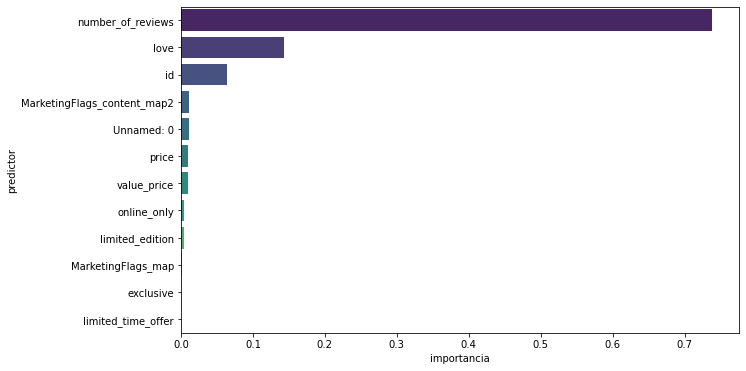

In [19]:

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()